### 53 - Support Vector Machine Capstone Project

Wine Fraud Quality Prediction using Support Vector Machine

### Project Goals
A wine distribution company was a victim of fraud. They have completed an audit of various samples of wine through the use of chemical analysis on samples.

They were defrauded by a supplier who passed off cheap low quality wine and told them it was a higher grade wine.

The goal of this Support Vector Machine Learning model is to predict if a wine is legit or fraud based on various chemical features.

### Setup the Environment and Imports

In [66]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC, SVR, LinearSVR, LinearSVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler

### Data Loading and Analysis

In [67]:
#Perform Data Loading
df = pd.read_csv('wine_fraud.csv')

In [68]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [69]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


In [71]:
#We are trying to predicct the quality, Let's see the columns
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [72]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

### Exploratory Data Analysis and Data Visualization

<Axes: xlabel='quality', ylabel='count'>

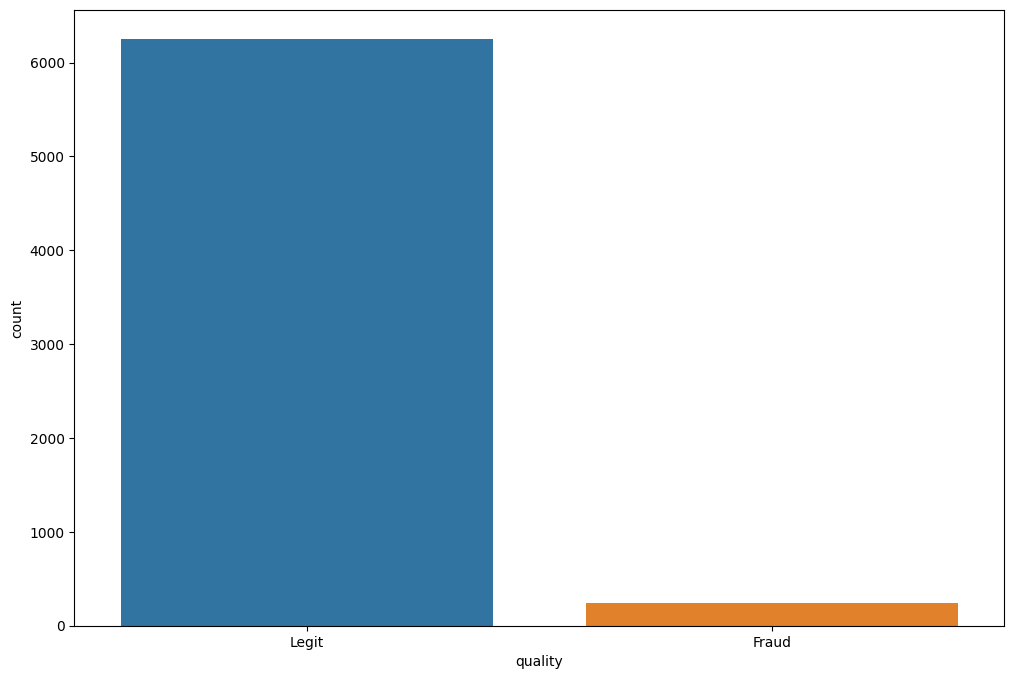

In [73]:
#Let's create a simple countplot
plt.figure(figsize=(12,8))
sns.countplot(x='quality', data=df)

<Axes: xlabel='type', ylabel='count'>

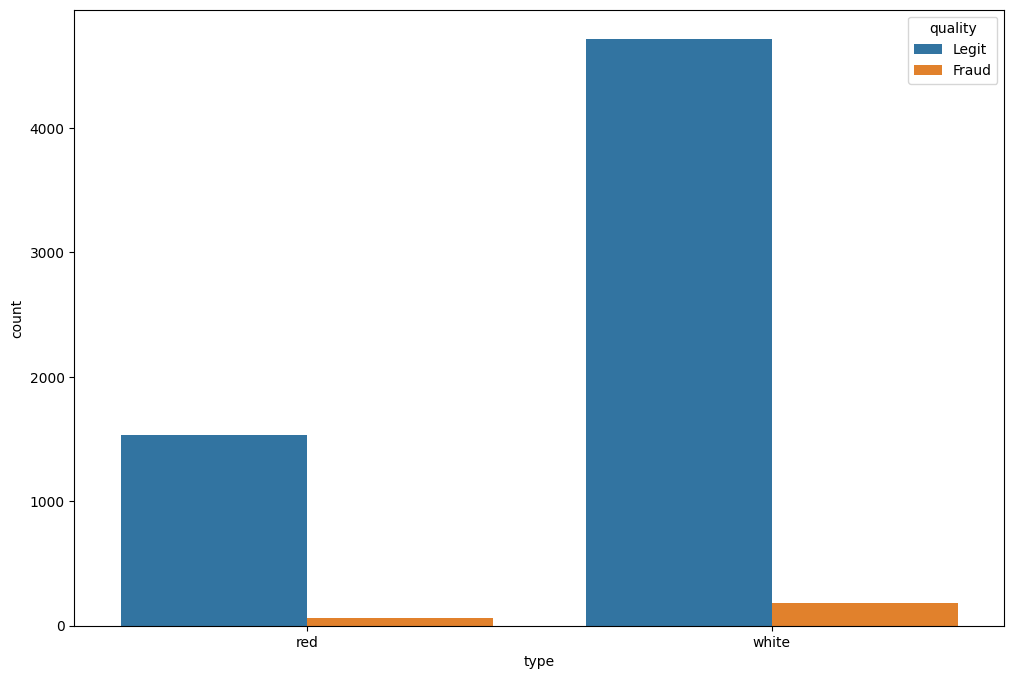

In [74]:
#Find out information from other features
#Let's see if there is a difference between red and white wine.
#Countplot that has the wine type with a hue
plt.figure(figsize=(12,8))
sns.countplot(x='type', data=df, hue='quality')

In [75]:
#Find out what percentage of white wines and red wines are fraude
reds = df[df["type"]=='red']
whites = df[df["type"]=='white']

In [76]:
print("Percentage of Fraud in Red Wines: ")
red_fraud_percentage = 100*(len(reds[reds['quality']=='Fraud'])/len(reds))
print(red_fraud_percentage)


Percentage of Fraud in Red Wines: 
3.9399624765478425


In [77]:
print("Percentage of Fraud in White Wines: ")
white_fraud_percentage = 100*(len(whites[whites['quality']=='Fraud'])/len(whites))
print(white_fraud_percentage)

Percentage of Fraud in White Wines: 
3.7362188648427925


In [82]:
#Calculate correlation between various features and quality columns
#Map the string columns into 0s and 1s
df['Fraud'] = df['quality'].map({'Legit': 0, 'Fraud': 1})

In [83]:
#use the corr() function
#use only numerical columns, so remove columns that include number
numeric_df = df.select_dtypes(include='number')
correlation = numeric_df.corr()['Fraud']
print(correlation)


fixed acidity           0.021794
volatile acidity        0.151228
citric acid            -0.061789
residual sugar         -0.048756
chlorides               0.034499
free sulfur dioxide    -0.085204
total sulfur dioxide   -0.035252
density                 0.016351
pH                      0.020107
sulphates              -0.034046
alcohol                -0.051141
Fraud                   1.000000
Name: Fraud, dtype: float64


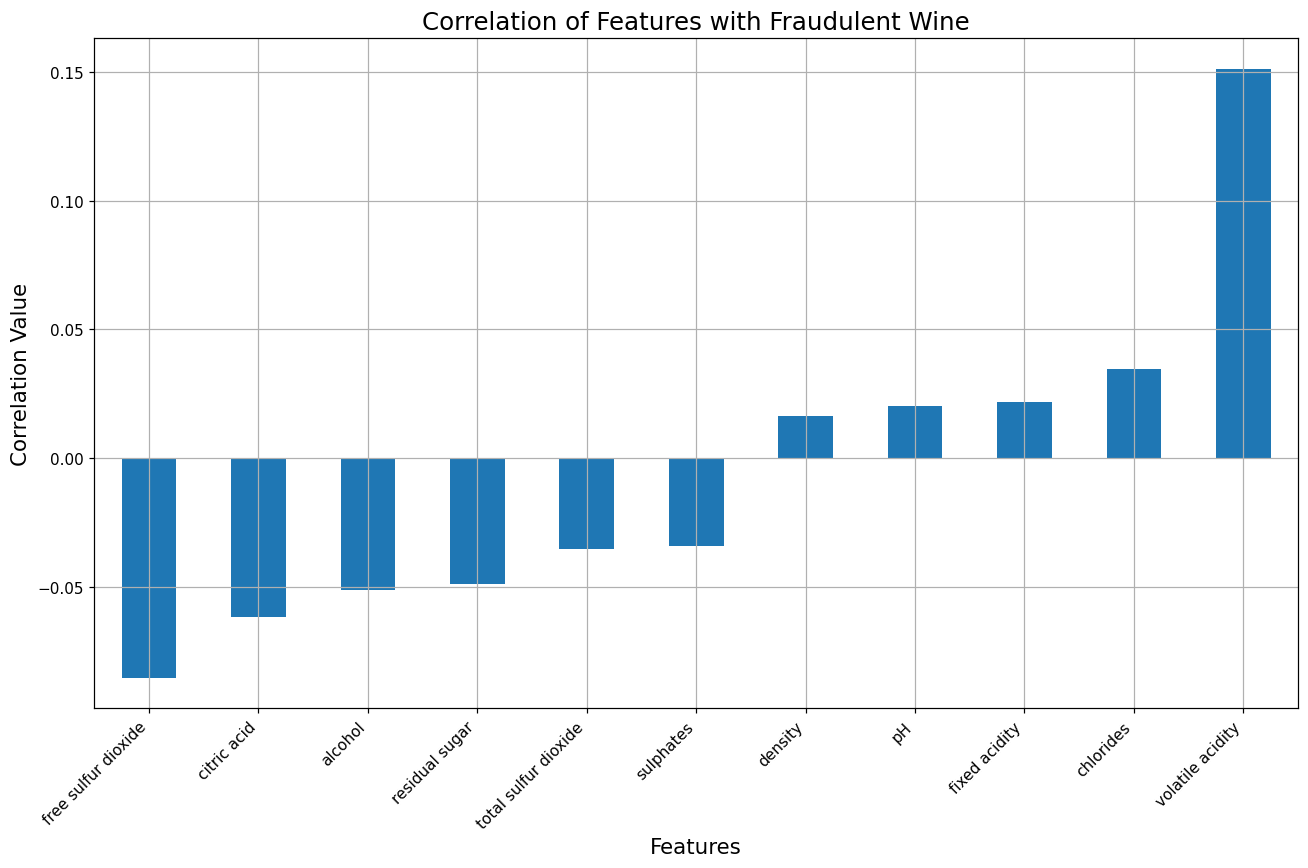

In [91]:
#create a bar plot of the correlation values to Fraudlent Wine
plt.figure(figsize=(12,8), dpi=110)
numeric_df.corr()['Fraud'][:-1].sort_values().plot(kind='bar')


plt.xticks(rotation=45, ha='right')
plt.title('Correlation of Features with Fraudulent Wine', fontsize=16)
plt.ylabel('Correlation Value', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.tight_layout()
plt.grid()
plt.show()

<Axes: >

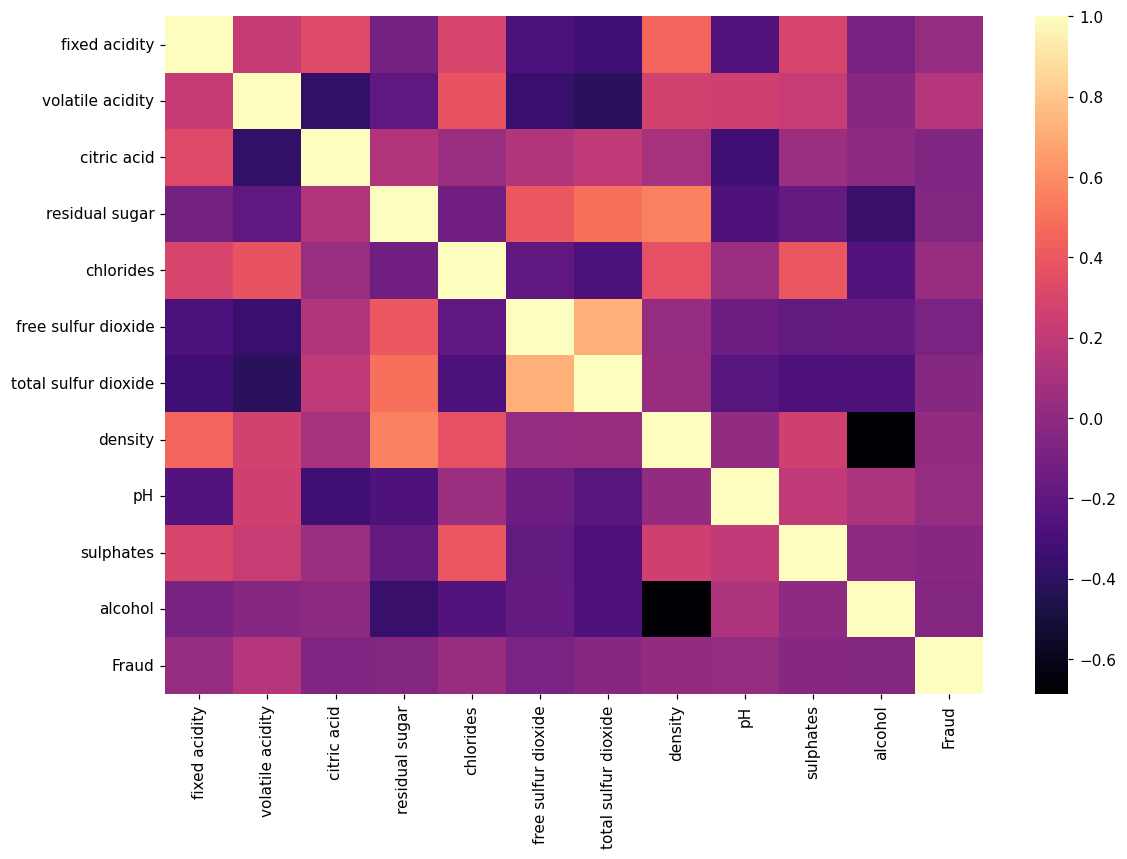

In [90]:
#Now let's create a heatmap of the various features and see relationships
plt.figure(figsize=(12,8), dpi=110)
sns.heatmap(numeric_df.corr(), cmap='magma')

### Machine Learning Process

In [93]:
#Let's convert the categorical column type into a string or dummy variables.
df['type'] = pd.get_dummies(df['type'],drop_first=True)
df = df.drop('Fraud', axis=1)

In [94]:
#Separate X and Y target labels
X = df.drop('quality',axis=1)
y = df['quality']

In [95]:
#perform train test split on data
#We'll have 10% of the test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [96]:
#Before getting into the SVM Model, we'll first scale the data
scaler = StandardScaler()

In [97]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [98]:
#Create the default SVM Model first
svc = SVC(class_weight='balanced')

In [99]:
#enter all possible parameters and then do a gridsearch
param_grid = {'C':[0.001,0.01,0.1,0.5,1],'gamma':['scale','auto']}
grid = GridSearchCV(svc,param_grid)

In [100]:
#fit the model
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})

In [101]:
grid.best_params_

{'C': 1, 'gamma': 'auto'}

### Model Evaluation

In [102]:
grid_pred = grid.predict(scaled_X_test)

<Figure size 1320x880 with 0 Axes>

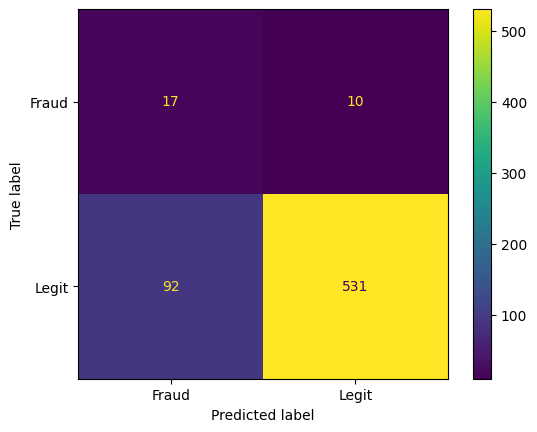

In [ ]:
#print the confusion matrix
ConfusionMatrixDisplay.from_estimator(grid, scaled_X_test, y_test)

In [107]:
#print a classification report
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

       Fraud       0.16      0.63      0.25        27
       Legit       0.98      0.85      0.91       623

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650

